In [1]:
from oop_functions.merge_dataset_functions import merge_data_over_years
from oop_functions.missing_values_functions import print_records_vs_unique
from oop_functions.util_functions import get_cols_missing_percentage, print_df, convert_numeric_to_float16
from processing_functions import *
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")


In [2]:
# reading datasets
personal_data = pd.read_csv('./dataset/Ovarian/ovar_data_mar22_d032222.csv')
screen_data = pd.read_csv('./dataset/Ovarian/Screening/ovar_screen_data_mar22_d032222.csv')
screen_abnorm_data = pd.read_csv('./dataset/Ovarian/Screening Abnormalities/ovar_scrsub_data_mar22_d032222.csv')
processed_data = pd.read_csv('./processed_dataset/recent_propagated_dataset.csv', index_col=0)

In [3]:
processed_data['was_screened']

0         0
1         0
2         0
3         1
4         0
         ..
658788    0
658789    0
658790    0
658791    0
658792    0
Name: was_screened, Length: 658793, dtype: int64

In [4]:
def get_column_values_count(df, get_counts_col):
    df = pd.DataFrame(df[get_counts_col].value_counts().sort_index())
    df = df.reset_index()
    df.columns = [get_counts_col, 'count']
    return df


In [13]:
get_column_values_count(processed_data, 'ca125_result')

,ca125_result,count
0,1.0,148142
1,2.0,2437
2,4.0,314
3,8.0,91
4,9.0,5


In [14]:
get_column_values_count(processed_data, 'tvu_result')

,tvu_result,count
0,1.0,67174
1,2.0,3737
2,3.0,34240
3,4.0,1513
4,8.0,1689
5,9.0,42636


array([[<AxesSubplot:title={'center':'ca125ii_level'}>]], dtype=object)

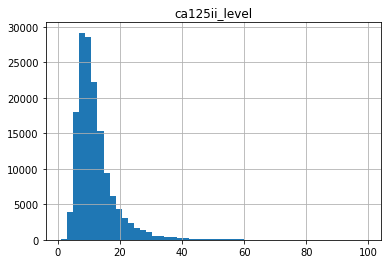

In [19]:
processed_data[processed_data['ca125ii_level'] < 100][['ca125ii_level']].hist(bins=50)

In [18]:
get_column_values_count(processed_data, 'ca125ii_level')

,ca125ii_level,count
0,1.0,6
1,2.0,101
2,3.0,756
3,4.0,3111
4,5.0,6915
...,...,...
213,1859.0,1
214,2182.0,1
215,3010.0,1
216,4756.0,1


In [5]:
get_column_values_count(processed_data, 'ovar_behavior')

,ovar_behavior,count
0,1.0,12
1,2.0,7
2,3.0,3478


In [6]:
get_column_values_count(processed_data, 'ovar_histtype')

,ovar_histtype,count
0,1.0,115
1,2.0,1997
2,3.0,27
3,4.0,54
4,6.0,238
5,8.0,88
6,9.0,18
7,31.0,871
8,34.0,30
9,39.0,59


In [7]:

ovar_type_data = processed_data[['plco_id', 'ovar_histtype', 'was_screened']].drop_duplicates()
get_column_values_count(ovar_type_data[ovar_type_data['was_screened']==0], 'ovar_histtype')

,ovar_histtype,count
0,1.0,12
1,2.0,187
2,3.0,3
3,4.0,5
4,6.0,17
5,8.0,12
6,9.0,3
7,31.0,75
8,34.0,2


In [8]:

get_column_values_count(ovar_type_data[ovar_type_data['was_screened']==1], 'ovar_histtype')

,ovar_histtype,count
0,1.0,17
1,2.0,163
2,3.0,3
3,4.0,7
4,6.0,25
5,8.0,6
6,9.0,1
7,31.0,65
8,34.0,4
9,39.0,6


In [9]:

years = [1, 3, 5, 10]
for year in years:
    label = f'cancer_in_next_{year}_years' 
    print(f'Getting count for a merged dataset for label {label}')
    ovar_type_data = processed_data[['plco_id', 'ovar_histtype', label]].drop_duplicates()
    print_df(get_column_values_count(ovar_type_data, 'ovar_histtype'))

Getting count for a merged dataset for label cancer_in_next_1_years
+----+-----------------+---------+
|    |   ovar_histtype |   count |
|----+-----------------+---------|
|  0 |               1 |      49 |
|  1 |               2 |     673 |
|  2 |               3 |      11 |
|  3 |               4 |      22 |
|  4 |               6 |      81 |
|  5 |               8 |      36 |
|  6 |               9 |       8 |
|  7 |              31 |     271 |
|  8 |              34 |      11 |
|  9 |              39 |      12 |
+----+-----------------+---------+
Getting count for a merged dataset for label cancer_in_next_3_years
+----+-----------------+---------+
|    |   ovar_histtype |   count |
|----+-----------------+---------|
|  0 |               1 |      43 |
|  1 |               2 |     633 |
|  2 |               3 |      10 |
|  3 |               4 |      18 |
|  4 |               6 |      74 |
|  5 |               8 |      31 |
|  6 |               9 |       8 |
|  7 |              31 |

In [10]:
ovar_type_data = personal_data[['plco_id', 'ovar_histtype', 'ovar_behavior']].drop_duplicates()

In [11]:
get_column_values_count(ovar_type_data, 'ovar_behavior')

,ovar_behavior,count
0,1.0,2
1,2.0,1
2,3.0,610


In [12]:
get_column_values_count(ovar_type_data, 'ovar_histtype')

,ovar_histtype,count
0,1.0,29
1,2.0,350
2,3.0,6
3,4.0,12
4,6.0,42
5,8.0,18
6,9.0,4
7,31.0,140
8,34.0,6
9,39.0,6
